<a href="https://colab.research.google.com/github/johnjosephcijin/mywork/blob/main/LangGraph_exmp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langgraph langsmith

In [ ]:
!pip install langchain langchain_groq langchain_community

In [ ]:
from google.colab import userdata
groq_api_key = userdata.get('groq_api_key')
langsmith= userdata.get('langsmith_api_key')

In [ ]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "Langgraph"

In [ ]:
from langchain_groq import ChatGroq

llm = ChatGroq(groq_api_key=groq_api_key,model = "gemma2-9b-it")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7af49d5d4ee0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7af49d5d6a40>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [ ]:
#Langgraph chatbot

from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages


In [ ]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)


In [ ]:
graph_builder

In [ ]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [ ]:
graph_builder.add_node("chatbot",chatbot)

In [ ]:
graph_builder

In [ ]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)


In [ ]:
graph=graph_builder.compile()

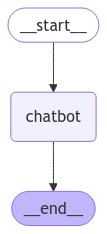

In [ ]:
from IPython.display import display, Image

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
  print(e)

In [ ]:
while True:
  user_input = input("User : ")
  if user_input.lower() in ["quit","q"]:
    print("Thank you")
    break
  for event in graph.stream({"messages":("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant: ",value['messages'].content)

User : hi
dict_values([{'messages': AIMessage(content='Hi! 👋 \n\nWhat can I do for you today? 😊  \n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 10, 'total_tokens': 28, 'completion_time': 0.032727273, 'prompt_time': 3.7e-07, 'queue_time': 0.015171949, 'total_time': 0.032727643}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-c5eeecc7-b313-4079-a974-53ab9972bccd-0', usage_metadata={'input_tokens': 10, 'output_tokens': 18, 'total_tokens': 28})}])
content='Hi! 👋 \n\nWhat can I do for you today? 😊  \n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 10, 'total_tokens': 28, 'completion_time': 0.032727273, 'prompt_time': 3.7e-07, 'queue_time': 0.015171949, 'total_time': 0.032727643}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-c5eeecc7-b313